In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot

df = pd.read_csv('preprocessed2.csv')

<Axes: >

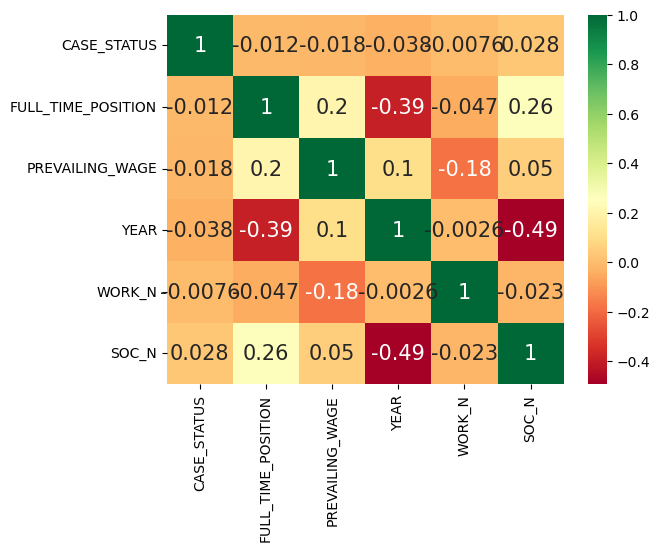

In [2]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [3]:
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR',
       'WORK_N', 'SOC_N'],
      dtype='object')

In [4]:
x = df.drop(['CASE_STATUS'], axis=1) # Independent variables
y = df['CASE_STATUS'] # Dependent variables

In [5]:
x.columns

Index(['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORK_N', 'SOC_N'], dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    392233
           1       0.58      0.18      0.27     30405
           2       0.28      0.04      0.07     13679
           3       0.30      0.01      0.03     13666
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.87    449987
   macro avg       0.34      0.20      0.22    449987
weighted avg       0.83      0.87      0.84    449987

[[387545   3207   1180    301      0      0]
 [ 24730   5468     70    137      0      0]
 [ 12984    159    514     22      0      0]
 [ 12795    602     75    194      0      0]
 [     3      0      0      0      0      0]
 [     1      0      0      0      0      0]]


In [10]:
import joblib
joblib.dump(classifier, 'knn.sav')

['knn.sav']